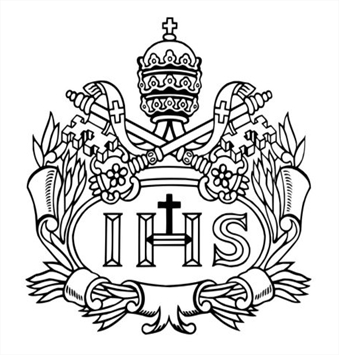

## EJERCICIO 3 - SONG EMBEDDINGS

## GRUPO DE TRABAJO


1. SONIA RAMÍREZ
2. MILI GALINDO
3. LOURDES RODIL
4. ANGUIE GARCÍA

## Song Embeddings - Skipgram Recommender

In this notebook, we'll use human-made music playlists to learn song embeddings. We'll treat a playlist as if it's a sentence and the songs it contains as words. We feed that to the word2vec algorithm which then learns embeddings for every song we have. These embeddings can then be used to recommend similar songs. This technique is used by Spotify, AirBnB, Alibaba, and others. It accounts for a vast portion of their user activity, user media consumption, and/or sales (in the case of Alibaba).

The [dataset we'll use](https://www.cs.cornell.edu/~shuochen/lme/data_page.html) was collected by Shuo Chen from Cornell University. The dataset contains playlists from hundreds of radio stations from around the US.

## Importing packages and dataset

In [12]:
import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec
from urllib import request
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The playlist dataset is a text file where every line represents a playlist. That playlist is basically a series of song IDs.

In [2]:
# Get the playlist dataset file
data = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/train.txt')

# Parse the playlist dataset file. Skip the first two lines as
# they only contain metadata
lines = data.read().decode("utf-8").split('\n')[2:]

# Remove playlists with only one song
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]


The `playlists` variable now contains a python list. Each item in this list is a playlist containing song ids. We can look at the first two playlists here:

In [3]:
print( 'Playlist #1:\n ', playlists[0], '\n')
print( 'Playlist #2:\n ', playlists[1])

Playlist #1:
  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '2', '42', '43', '44', '45', '46', '47', '48', '20', '49', '8', '50', '51', '52', '53', '54', '55', '56', '57', '25', '58', '59', '60', '61', '62', '3', '63', '64', '65', '66', '46', '47', '67', '2', '48', '68', '69', '70', '57', '50', '71', '72', '53', '73', '25', '74', '59', '20', '46', '75', '76', '77', '59', '20', '43'] 

Playlist #2:
  ['78', '79', '80', '3', '62', '81', '14', '82', '48', '83', '84', '17', '85', '86', '87', '88', '74', '89', '90', '91', '4', '73', '62', '92', '17', '53', '59', '93', '94', '51', '50', '27', '95', '48', '96', '97', '98', '99', '100', '57', '101', '102', '25', '103', '3', '104', '105', '106', '107', '47', '108', '109', '110', '111', '112', '113', '25', '63', '62', '114', '115', '84', '116', '117',

## Training the Word2Vec Model
Our dataset is now in the shape the the Word2Vec model expects as input. We pass the dataset to the model.

In [4]:
model = Word2Vec(playlists, vector_size=32, window=20, negative=50, min_count=1, workers=4)

The model is now trained. Every song has an embedding. We only have song IDs, though, no titles or other info. Let's grab the song information file.

## Song Title and Artist File
Let's load and parse the file containing song titles and artists

In [5]:
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
songs_file = songs_file.read().decode("utf-8").split('\n')
songs = [s.rstrip().split('\t') for s in songs_file]

In [6]:
songs_df = pd.DataFrame(data=songs, columns = ['id', 'title', 'artist'])
songs_df = songs_df.set_index('id')

In [7]:
songs_df.head()

,title,artist
id,,
0,Gucci Time (w\/ Swizz Beatz),Gucci Mane
1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross
2,Get Back Up (w\/ Chris Brown),T.I.
3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher
4,Whip My Hair,Willow


### Exercise:

Build visualization for the embeddings of the song recommender.

In [13]:
## Librerías a usar

import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec
from urllib import request
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Get the playlist dataset file
songs_file = request.urlopen('https://storage.googleapis.com/maps-premium/dataset/yes_complete/song_hash.txt')
# Parsear la playlist. Saltar las primeras dos lineas al ser metadatos:
songs_file = songs_file.read().decode("utf-8").split('\n')[2:]

# Remover las playlists con sólo 1 canción
playlists = [s.rstrip().split() for s in lines if len(s.split()) > 1]

Exploración de los Datos:

In [51]:
# Verificar el número de canciones por artista
songs_df['artist'].value_counts().sort_values(ascending=False)

-                                  1812
The Beatles                         201
Frank Sinatra                       166
Vicente Fernandez                   166
Metallica                           141
                                   ... 
GWAR                                  1
Mock Orange                           1
The Pack A.D.                         1
Louis Armstrong & His All Stars       1
Picture Me Broken                     1
Name: artist, Length: 15976, dtype: int64

In [46]:
# Generar lista song_ID
song_ids = [playlist[0] for playlist in playlists]


In [52]:
# Una vez entrenado el modelo, verificamos si los ID de las canciones se encuentran en el modelo
song_ids_faltantes = []
for song_id in song_ids:
    if song_id not in model2.wv.key_to_index:
        song_ids_faltantes.append(song_id)

In [53]:
#Puede que algunos ID no existan
song_ids = [song_id for song_id in song_ids if song_id not in missing_song_ids]


In [54]:
# Entrenar el modelo
model2 = Word2Vec(song_ids, vector_size=32, window=20, negative=50, min_count=1, workers=4)

In [58]:
embedding_songs = np.array([model2.wv[song_id] for song_id in song_ids])


In [66]:
#Ahora reducimos la dimensionalidad con TSNE para visualizarla
tsne_model_en_2d = TSNE(n_components=2, n_iter=1500, random_state=2020).fit_transform(embeddings)

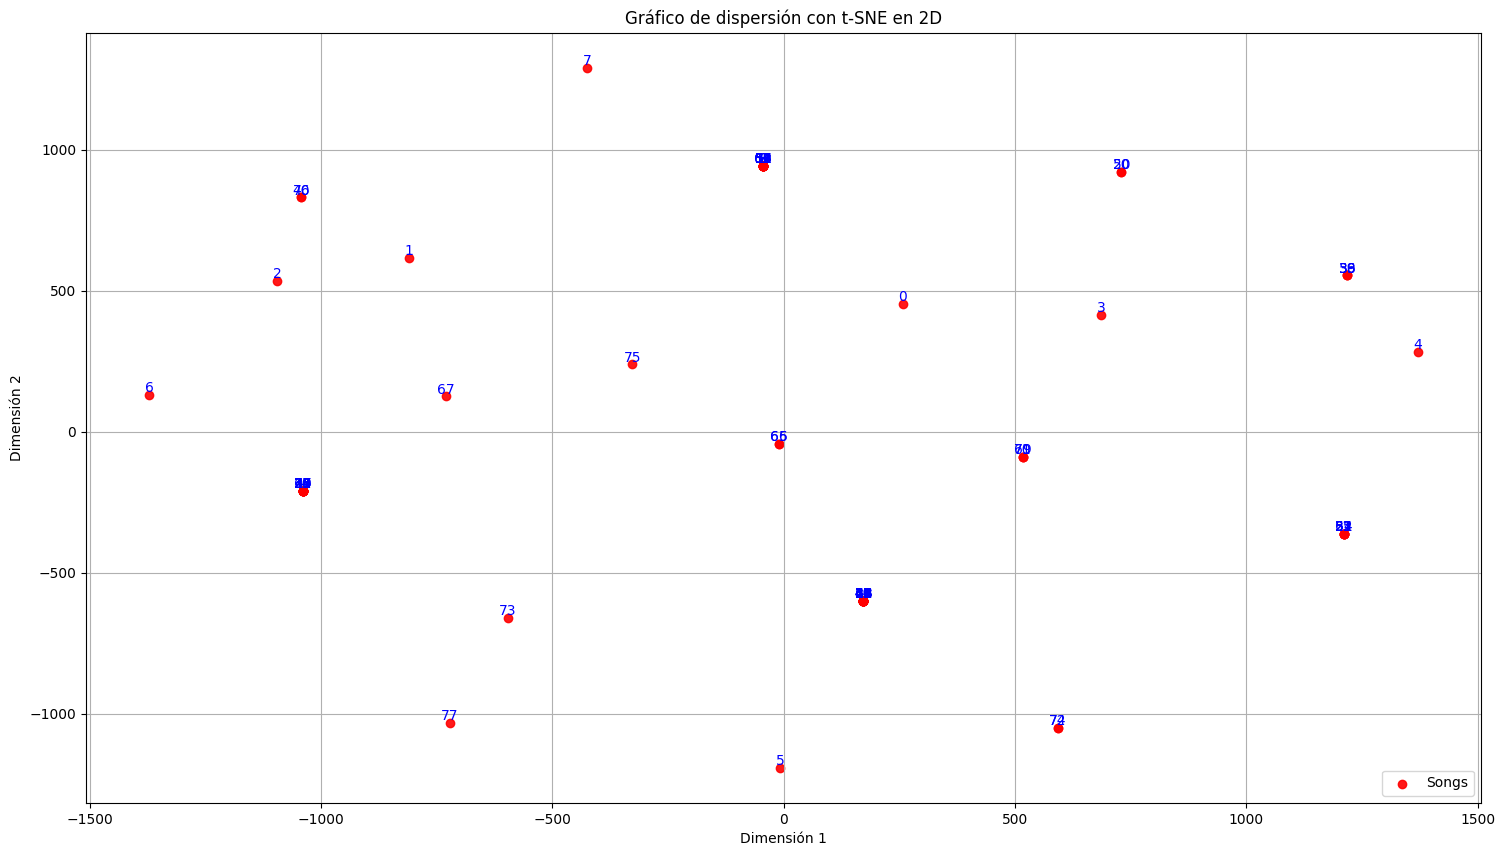

In [100]:
#Visualización de embeddings
# Crear un gráfico de dispersión con las coordenadas t-SNE
plt.figure(figsize=(18, 10))
plt.scatter(tsne_model_en_2d[:, 0], tsne_model_en_2d[:, 1], color='red', alpha=0.9, label="Songs")
plt.title('Gráfico de dispersión con t-SNE en 2D')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')

# Añadir etiquetas a cada punto
for i, (x, y) in enumerate(tsne_model_en_2d):
    plt.text(x, y, str(i), color='blue', fontsize=10, ha='center', va='bottom')



plt.legend(loc=4)
plt.grid(True)
plt.show()

In [94]:
songs_df.iloc[7]

title     Blowing Me Kisses
artist           Soulja Boy
Name: 7 , dtype: object

In [95]:
songs_df.iloc[75]

title     Hello, Good Morning (w\/ T.I.)
artist               Diddy & Dirty Money
Name: 75 , dtype: object